## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [23]:
import pandas as pd

### Load the dataset

In [24]:
data = pd.read_csv('tips.csv')

In [25]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [26]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### 2. Compute the average bill amount for each day.

In [27]:
data.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [28]:
data.groupby('sex')['tip'].sum()

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [29]:
data.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [30]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 6. Find the busiest day in terms of the orders?

In [31]:
data.groupby('day')['total_bill'].sum().sort_values(ascending=False)

day
Sat     1778.40
Sun     1627.16
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [32]:
data['total_bill'].skew()

1.1332130376158205

In [33]:
import seaborn as sns

C:\Users\grvbh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

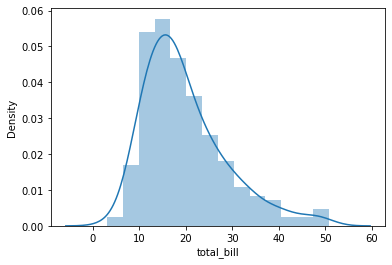

In [34]:
sns.distplot(data['total_bill'])

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [35]:
data[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

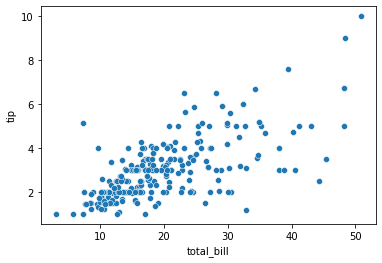

In [36]:
sns.scatterplot(x='total_bill',y='tip',data=data)

### 9. What is the percentage of males and females in the dataset? and display it in the plot

C:\Users\grvbh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

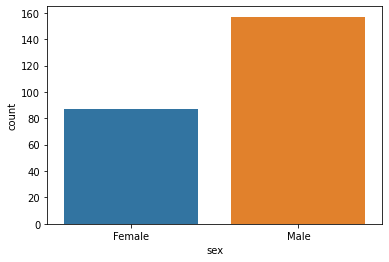

In [37]:
sns.countplot(data['sex'])

In [38]:
data['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

10. Compute the gender-wise count based on smoking habits and display it in the plot

<AxesSubplot:xlabel='sex'>

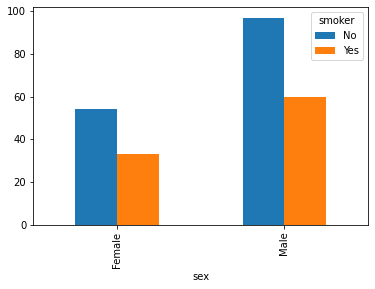

In [39]:
pd.crosstab(data['sex'],data['smoker']).plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [40]:
import numpy as np

<AxesSubplot:xlabel='day', ylabel='tip'>

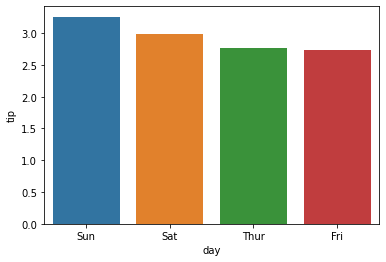

In [41]:
sns.barplot(x='day', y='tip', data=data, estimator=np.mean, ci=False)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [42]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:xlabel='size', ylabel='total_bill'>

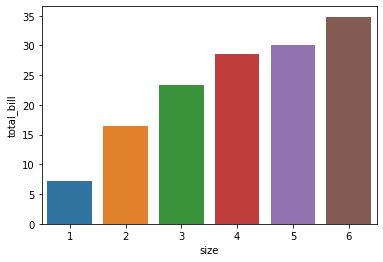

In [43]:
sns.barplot(x='size', y='total_bill', estimator=np.mean, ci=False, data=data)

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

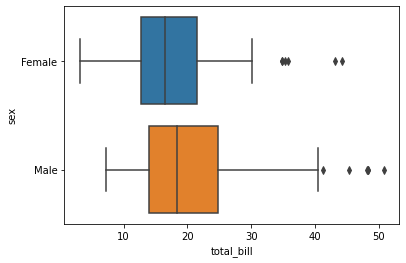

In [44]:
sns.boxplot(x=data['total_bill'], y=data['sex'], orient="h")

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [45]:
data.groupby(['day','time'])['total_bill'].max()

day   time  
Fri   Dinner    40.17
      Lunch     16.27
Sat   Dinner    50.81
Sun   Dinner    48.17
Thur  Dinner    18.78
      Lunch     43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [46]:
(data.isnull().sum()/len(data))*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [47]:
data[data.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [48]:
data.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [49]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

C:\Users\grvbh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

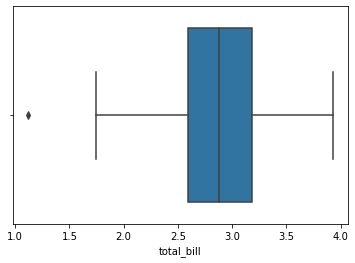

In [51]:
sns.boxplot(np.log(data['total_bill']))

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

C:\Users\grvbh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

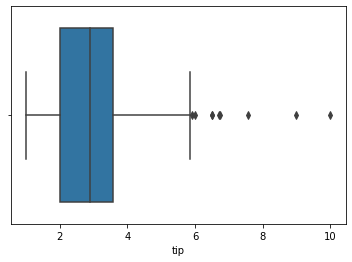

In [52]:
sns.boxplot(data['tip'])

In [54]:
q1=data['tip'].quantile(0.25)
q2=data['tip'].quantile(0.5)
q3=data['tip'].quantile(0.75)

In [55]:
iqr=q3-q1

In [56]:
upper_limit=q3+1.5*(iqr)

In [58]:
lower_limit=q1-1.5*(iqr)

In [61]:
data_wo_out=data.loc[(data['tip'] >= lower_limit) & (data['tip'] <= upper_limit)]

<AxesSubplot:xlabel='tip'>

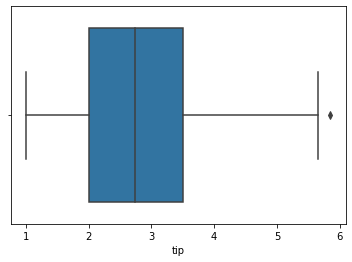

In [62]:
sns.boxplot(data_wo_out['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [65]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [68]:
cat_data=data[['sex','smoker','day','time']]

In [71]:
pd.get_dummies(cat_data, drop_first=True).head(5)

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [72]:
data['total_bill'].min()

3.07

In [73]:
data['total_bill'].max()

50.81

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
mm = MinMaxScaler()

In [81]:
data['total_bill'] = mm.fit_transform(data[['total_bill']])

In [82]:
data['total_bill'].max()

0.9999999999999999

In [83]:
data['total_bill'].min()

0.0

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [85]:
tips_df = data.copy()

In [86]:
x = data.drop('tip', axis=1)

In [87]:
x

,total_bill,sex,smoker,day,time,size
0,0.291579,Female,No,Sun,Dinner,2
1,0.152283,Male,No,Sun,Dinner,3
2,0.375786,Male,No,Sun,Dinner,3
3,0.431713,Male,No,Sun,Dinner,2
4,0.450775,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,0.543779,Male,No,Sat,Dinner,3
240,0.505027,Female,Yes,Sat,Dinner,2
241,0.410557,Male,Yes,Sat,Dinner,2
242,0.308965,Male,No,Sat,Dinner,2


In [88]:
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

### Happy Learning:)